# Credit Card Fraud Detection

## Step 1: Cleaning and Setting up Dataset

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/441_Lecture_3/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
# choosing the variables in order to define if it was done during the holiday; the amount of money; the population of the city, and the the location of the merchant
df_select= df[['trans_date_trans_time','amt', 'city_pop', 'is_fraud', 'merch_lat', 'merch_long' ]]

In [ ]:
df_select

,trans_date_trans_time,amt,city_pop,is_fraud,merch_lat,merch_long
0,2020-06-21 12:14:25,2.86,333497,0,33.986391,-81.200714
1,2020-06-21 12:14:33,29.84,302,0,39.450498,-109.960431
2,2020-06-21 12:14:53,41.28,34496,0,40.495810,-74.196111
3,2020-06-21 12:15:15,60.05,54767,0,28.812398,-80.883061
4,2020-06-21 12:15:17,3.19,1126,0,44.959148,-85.884734
...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,0,39.946837,-91.333331
555715,2020-12-31 23:59:09,111.84,28739,0,29.661049,-96.186633
555716,2020-12-31 23:59:15,86.88,3684,0,46.658340,-119.715054
555717,2020-12-31 23:59:24,7.99,129,0,44.470525,-117.080888


In [ ]:
type(df_select['trans_date_trans_time'][0])

str

In [ ]:
df_select["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

<ipython-input-10-db2184404d38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])


### Creating a Holiday Variable
Studying if the fraud was detected during the holiday season

In [ ]:
# According to statistics published online, majority of credit card frauds happen during the holiday season which is november and december, hence I create a dummy variable for it.
df_select['time_var'] = pd.to_datetime(df_select['trans_date_trans_time']).dt.month
df_select["time_var"] = ["Holiday" if 11 <= i <= 12 else "other" for i in df_select["time_var"]]
df_select = pd.concat([df_select, pd.get_dummies(df_select['time_var'], prefix='holiday', drop_first=True)], axis=1)


<ipython-input-11-e56513d7fe66>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = pd.to_datetime(df_select['trans_date_trans_time']).dt.month
<ipython-input-11-e56513d7fe66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = ["Holiday" if 11 <= i <= 12 else "other" for i in df_select["time_var"]]


In [ ]:
df_select

,trans_date_trans_time,amt,city_pop,is_fraud,merch_lat,merch_long,time_var,holiday_other
0,2020-06-21 12:14:25,2.86,333497,0,33.986391,-81.200714,other,1
1,2020-06-21 12:14:33,29.84,302,0,39.450498,-109.960431,other,1
2,2020-06-21 12:14:53,41.28,34496,0,40.495810,-74.196111,other,1
3,2020-06-21 12:15:15,60.05,54767,0,28.812398,-80.883061,other,1
4,2020-06-21 12:15:17,3.19,1126,0,44.959148,-85.884734,other,1
...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,43.77,519,0,39.946837,-91.333331,Holiday,0
555715,2020-12-31 23:59:09,111.84,28739,0,29.661049,-96.186633,Holiday,0
555716,2020-12-31 23:59:15,86.88,3684,0,46.658340,-119.715054,Holiday,0
555717,2020-12-31 23:59:24,7.99,129,0,44.470525,-117.080888,Holiday,0


In [ ]:
X = df_select
y = df_select["is_fraud"]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max_scaler.fit_transform(X)

In [ ]:
df_select.head()

,amt,city_pop,is_fraud,merch_lat,merch_long,holiday_other
0,2.86,333497,0,33.986391,-81.200714,1
1,29.84,302,0,39.450498,-109.960431,1
2,41.28,34496,0,40.495810,-74.196111,1
3,60.05,54767,0,28.812398,-80.883061,1
4,3.19,1126,0,44.959148,-85.884734,1


# Step 2: Preprocessing and Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 3: Making three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


# Oversampling
oversample = RandomOverSampler(random_state = 0)
oversample.fit(X_train, y_train)
X_over, y_over = oversample.fit_resample(X_train, y_train)

# Undersampling
undersample = RandomUnderSampler(random_state = 0)
undersample.fit(X_train, y_train)
X_under, y_under = undersample.fit_resample(X_train, y_train)

# SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)


# Step 4: Training three logistic regression models 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Oversampled data
logreg_over = LogisticRegression()
logreg_over.fit(X_over, y_over)

# Undersampled data
logreg_under = LogisticRegression()
logreg_under.fit(X_under, y_under)

# SMOTE data
logreg_smote = LogisticRegression()
logreg_smote.fit(X_smote, y_smote)

LogisticRegression()

# Step 5: Testing the three models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Oversampled data
y_pred_over = logreg_over.predict(X_test)

# Undersampled data
y_pred_under = logreg_under.predict(X_test)

# SMOTE data
y_pred_smote = logreg_smote.predict(X_test)

# Step 6: Which performed best in Out of Sample metrics?

In [ ]:
# Oversampled data
acc_over = accuracy_score(y_test, y_pred_over)
prec_over = precision_score(y_test, y_pred_over)


# Undersampled data
acc_under = accuracy_score(y_test, y_pred_under)
prec_under = precision_score(y_test, y_pred_under)


# SMOTE data
acc_smote = accuracy_score(y_test, y_pred_smote)
prec_smote = precision_score(y_test, y_pred_smote)

# Printing the values of the dataset
print(acc_over, acc_under, acc_smote)
print(prec_over, prec_under, prec_smote)

# Comparing the metrics for all three models
best_model = max(zip([acc_over, acc_under, acc_smote], ['Oversampled', 'Undersampled', 'SMOTE']))
print("Best model based on accuracy: ", best_model[1])

best_model = max(zip([prec_over, prec_under, prec_smote], ['Oversampled', 'Undersampled', 'SMOTE']))
print("Best model based on precision: ", best_model[1])



0.9497408767004967 0.9481513472012284 0.9501847453153867
0.058242389431361286 0.05622489959839357 0.058434782608695654
Best model based on accuracy:  SMOTE
Best model based on precision:  SMOTE


# Step 7: Picking two features and plotting the two classes before and after SMOTE.

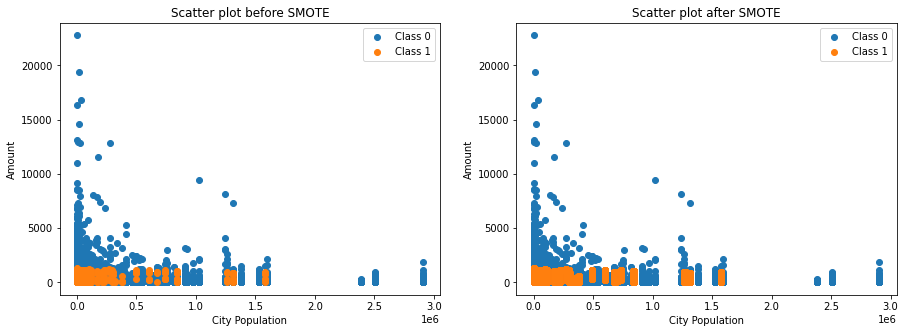

In [ ]:
# Setting up subplot
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting the scatter plot before SMOTE
ax[0].scatter(X_train[y_train==0]['city_pop'], X_train[y_train==0]['amt'], label='Class 0')
ax[0].scatter(X_train[y_train==1]['city_pop'], X_train[y_train==1]['amt'], label='Class 1')
ax[0].set_title('Scatter plot before SMOTE')
ax[0].set_xlabel('City Population')
ax[0].set_ylabel('Amount')
ax[0].legend()

# Plotting the scatter plot after SMOTE
ax[1].scatter(X_smote[y_smote==0]['city_pop'], X_smote[y_smote==0]['amt'], label='Class 0')
ax[1].scatter(X_smote[y_smote==1]['city_pop'], X_smote[y_smote==1]['amt'], label='Class 1')
ax[1].set_title('Scatter plot after SMOTE')
ax[1].set_xlabel('City Population')
ax[1].set_ylabel('Amount')
ax[1].legend()

plt.show()